### Importación de datos



In [95]:
import pandas as pd

tienda = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv")
tienda2 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv")
tienda3 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv")
tienda4 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv")

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [88]:
import pandas as pd

tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

ingresos = {nombre: df['Precio'].sum() for nombre, df in tiendas.items()}

for tienda, ingreso in ingresos.items():
    print(f"{tienda}: ${ingreso:,.2f}")

resumen = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingreso Total'])
print("\nResumen:")
print(resumen)

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00

Resumen:
     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


# 2. Ventas por categoría


=== Tienda 1 ===
Categorías más vendidas:
              Categoría  Cantidad Vendida
                Muebles               465
           Electrónicos               448
               Juguetes               324
      Electrodomésticos               312
   Deportes y diversión               284
 Instrumentos musicales               182
                 Libros               173
Artículos para el hogar               171


<Figure size 1000x500 with 0 Axes>

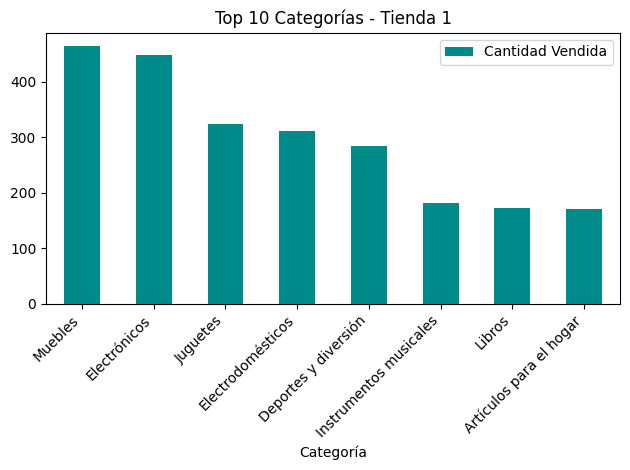


=== Tienda 2 ===
Categorías más vendidas:
              Categoría  Cantidad Vendida
                Muebles               442
           Electrónicos               422
               Juguetes               313
      Electrodomésticos               305
   Deportes y diversión               275
 Instrumentos musicales               224
                 Libros               197
Artículos para el hogar               181


<Figure size 1000x500 with 0 Axes>

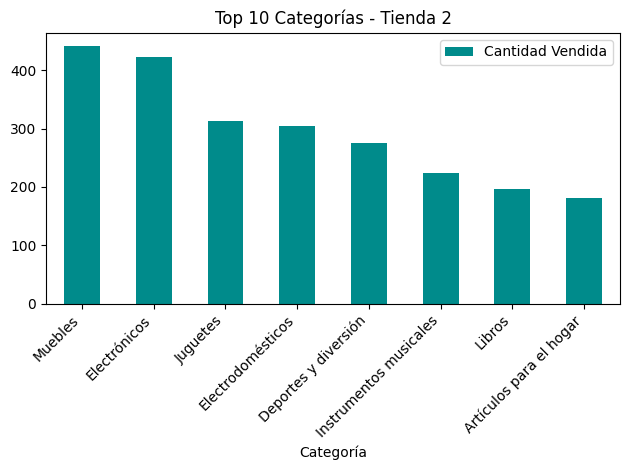


=== Tienda 3 ===
Categorías más vendidas:
              Categoría  Cantidad Vendida
                Muebles               499
           Electrónicos               451
               Juguetes               315
      Electrodomésticos               278
   Deportes y diversión               277
                 Libros               185
 Instrumentos musicales               177
Artículos para el hogar               177


<Figure size 1000x500 with 0 Axes>

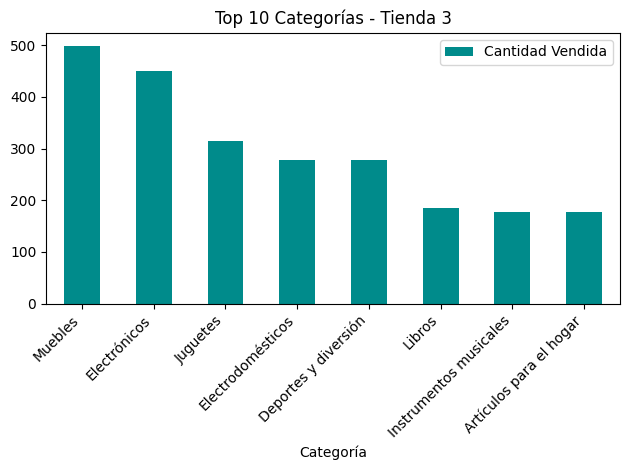


=== Tienda 4 ===
Categorías más vendidas:
              Categoría  Cantidad Vendida
                Muebles               480
           Electrónicos               451
               Juguetes               338
   Deportes y diversión               277
      Electrodomésticos               254
Artículos para el hogar               201
                 Libros               187
 Instrumentos musicales               170


<Figure size 1000x500 with 0 Axes>

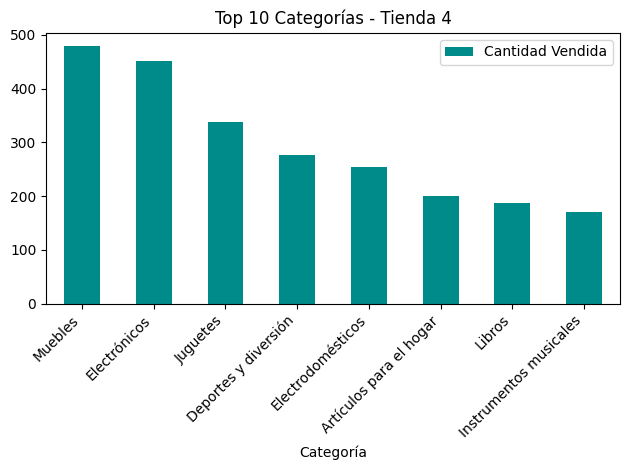

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario con tus DataFrames (asegúrate que están cargados correctamente)
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Procesamiento para cada tienda
for nombre, df in tiendas.items():
    print(f"\n=== {nombre} ===")
    print("Categorías más vendidas:")

    # Verificamos que la columna existe
    if 'Categoría del Producto' in df.columns:
        # Conteo por categoría (ordenado de mayor a menor)
        ventas_por_categoria = df['Categoría del Producto'].value_counts().reset_index()
        ventas_por_categoria.columns = ['Categoría', 'Cantidad Vendida']

        # Mostrar tabla formateada
        print(ventas_por_categoria.to_string(index=False))

        # Gráfico de barras (top 10)
        plt.figure(figsize=(10, 5))
        ventas_por_categoria.head(10).plot.bar(
            x='Categoría',
            y='Cantidad Vendida',
            title=f'Top 10 Categorías - {nombre}',
            color='darkcyan'
        )
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error: La columna 'Categoría del Producto' no existe en {nombre}")
        print("Columnas disponibles:", df.columns.tolist())

# 3. Calificación promedio de la tienda



=== Tienda 1 ===
Análisis de satisfacción:
Calificación promedio: 3.98

Calificación por categoría:
Categoría del Producto
Juguetes                   4.077160
Instrumentos musicales     4.049451
Electrodomésticos          4.032051
Electrónicos               4.004464
Libros                     3.976879
Muebles                    3.946237
Deportes y diversión       3.897887
Artículos para el hogar    3.748538

=== Tienda 2 ===
Análisis de satisfacción:
Calificación promedio: 4.04

Calificación por categoría:
Categoría del Producto
Muebles                    4.092760
Electrodomésticos          4.072131
Artículos para el hogar    4.071823
Deportes y diversión       4.065455
Instrumentos musicales     4.035714
Juguetes                   4.025559
Electrónicos               3.971564
Libros                     3.949239

=== Tienda 3 ===
Análisis de satisfacción:
Calificación promedio: 4.05

Calificación por categoría:
Categoría del Producto
Juguetes                   4.196825
Muebles         

<Figure size 1000x500 with 0 Axes>

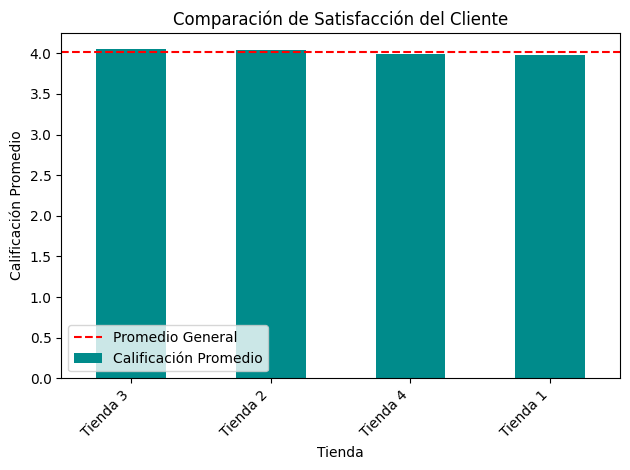

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario con tus DataFrames
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Procesamiento para cada tienda
resultados = []
for nombre, df in tiendas.items():
    print(f"\n=== {nombre} ===")
    print("Análisis de satisfacción:")

    # Verificamos que la columna existe
    if 'Calificación' in df.columns:  # Ajusta el nombre si es diferente
        # Cálculo del promedio
        promedio = df['Calificación'].mean()
        resultados.append({'Tienda': nombre, 'Calificación Promedio': promedio})

        # Mostrar resultados básicos
        print(f"Calificación promedio: {promedio:.2f}")

        # Análisis por categoría si existe
        if 'Categoría del Producto' in df.columns:
            print("\nCalificación por categoría:")
            calif_categoria = df.groupby('Categoría del Producto')['Calificación'].mean()
            print(calif_categoria.sort_values(ascending=False).to_string())

    else:
        print(f"Error: La columna 'Calificación' no existe en {nombre}")
        print("Columnas disponibles:", df.columns.tolist())

# Resultados consolidados
if resultados:
    print("\n⭐ RESUMEN COMPARATIVO ⭐")
    resumen = pd.DataFrame(resultados).sort_values('Calificación Promedio', ascending=False)
    print(resumen.to_string(index=False))

    # Gráfico comparativo
    plt.figure(figsize=(10, 5))
    resumen.plot.bar(
        x='Tienda',
        y='Calificación Promedio',
        title='Comparación de Satisfacción del Cliente',
        color='darkcyan',
        legend=False
    )
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Calificación Promedio')
    plt.axhline(resumen['Calificación Promedio'].mean(), color='red', linestyle='--',
               label='Promedio General')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 4. Productos más y menos vendidos


📊 Tienda 1 - Análisis de productos

✅ TOP 5 PRODUCTOS MÁS VENDIDOS:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56

❌ 5 PRODUCTOS MENOS VENDIDOS:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33


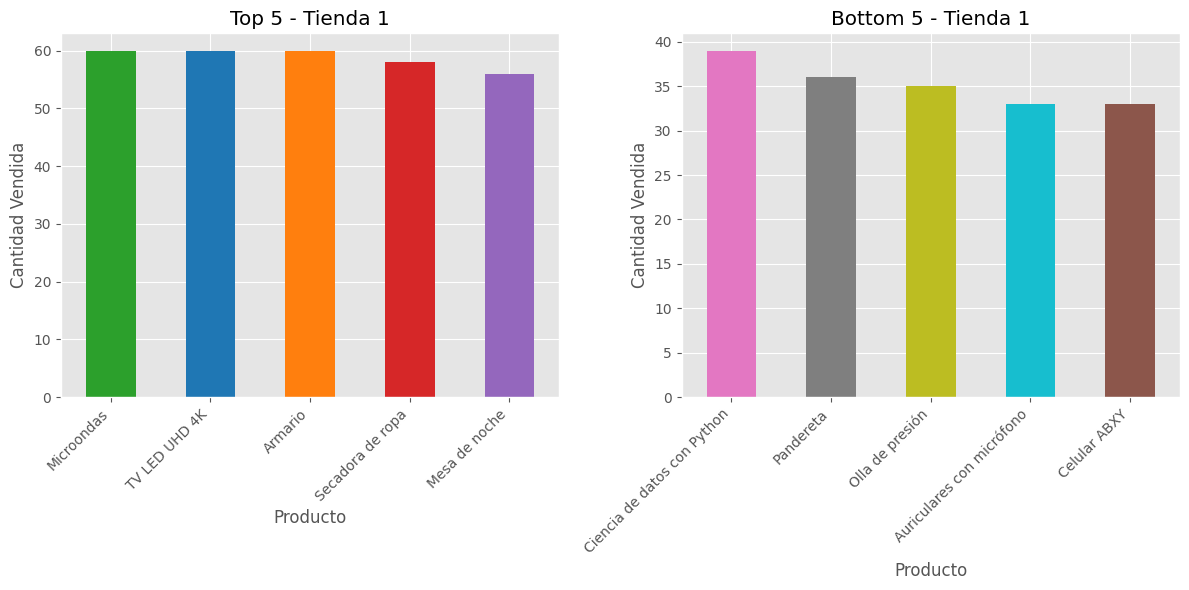

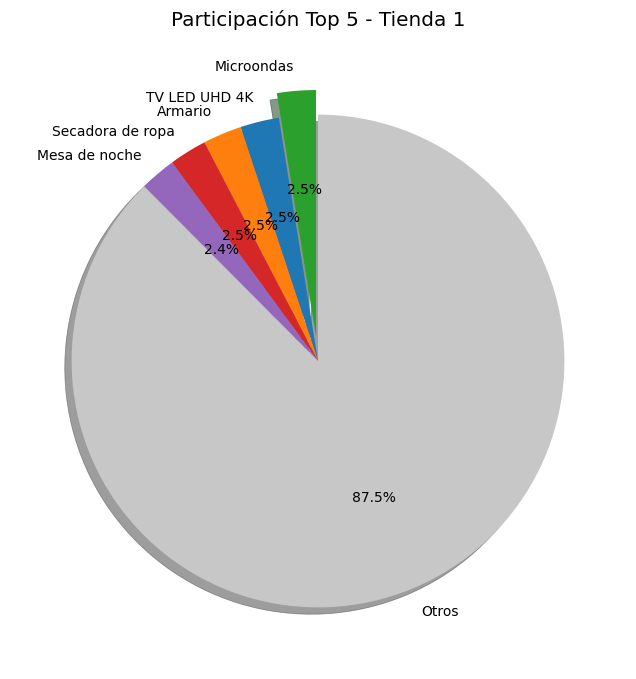


📊 Tienda 2 - Análisis de productos

✅ TOP 5 PRODUCTOS MÁS VENDIDOS:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58

❌ 5 PRODUCTOS MENOS VENDIDOS:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32


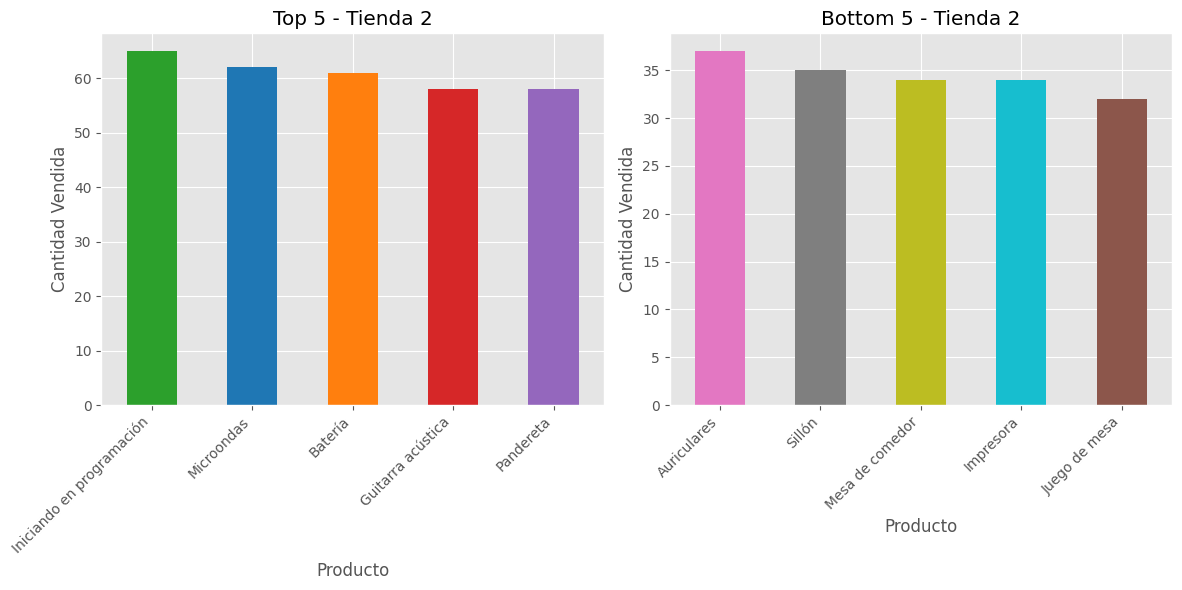

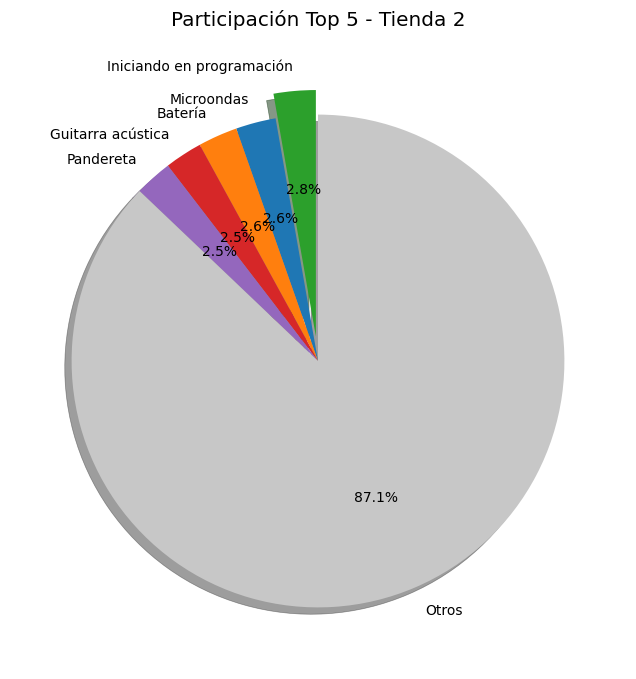


📊 Tienda 3 - Análisis de productos

✅ TOP 5 PRODUCTOS MÁS VENDIDOS:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55

❌ 5 PRODUCTOS MENOS VENDIDOS:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35


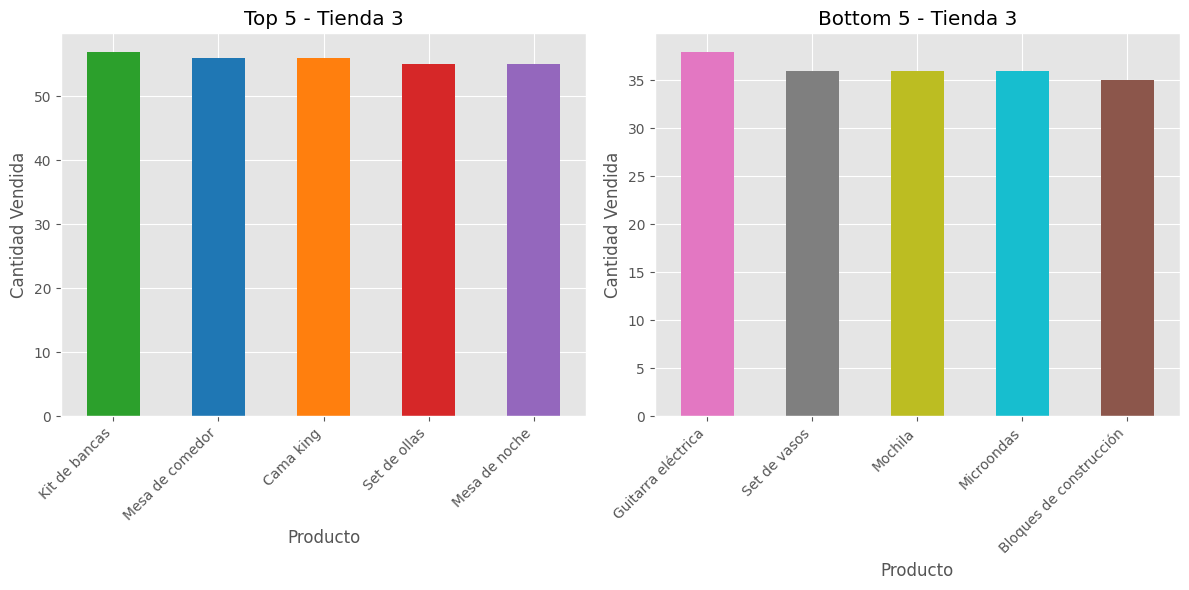

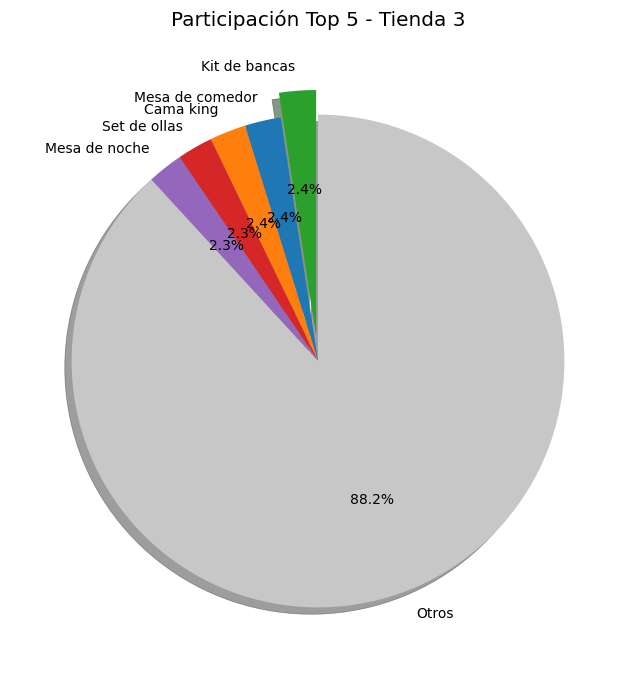


📊 Tienda 4 - Análisis de productos

✅ TOP 5 PRODUCTOS MÁS VENDIDOS:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55

❌ 5 PRODUCTOS MENOS VENDIDOS:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33


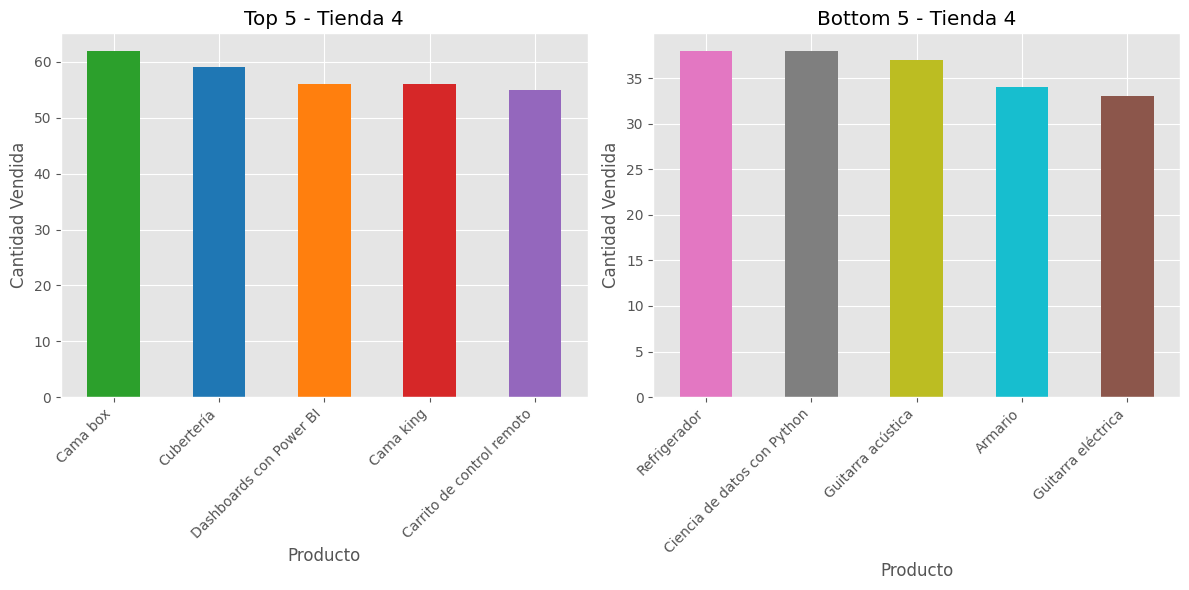

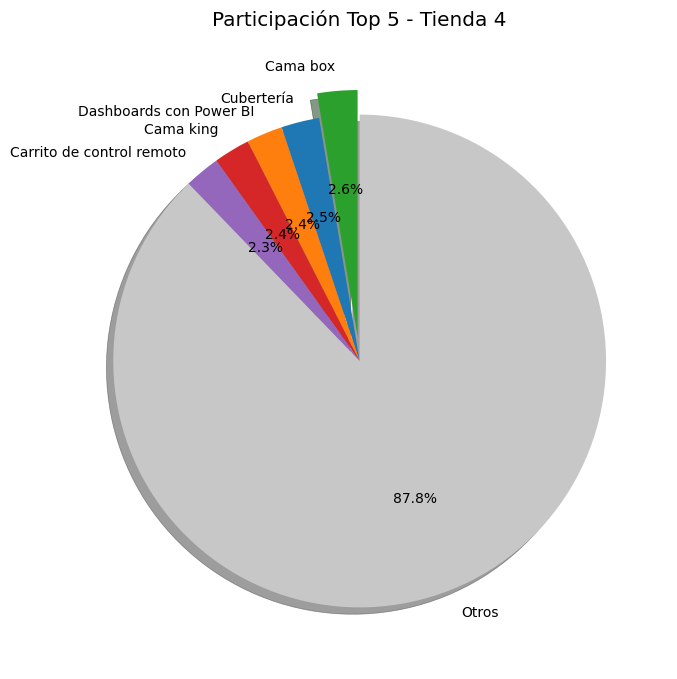


🔍 Análisis completado para todas las tiendas


In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de estilo
plt.style.use('ggplot')  # Usamos el estilo ggplot que viene con matplotlib

# Diccionario de tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre, df in tiendas.items():
    print(f"\n📊 {nombre} - Análisis de productos")

    # Verificar columna de productos
    if 'Producto' not in df.columns:
        print("⚠️ Advertencia: No se encontró la columna 'Producto'")
        print("Columnas disponibles:", df.columns.tolist())
        continue

    # Conteo de productos
    productos_vendidos = df['Producto'].value_counts()
    total_productos = productos_vendidos.sum()

    # Top 5 y últimos 5 (excluyendo no vendidos)
    top_5 = productos_vendidos.head(5)
    bottom_5 = productos_vendidos[productos_vendidos > 0].tail(5)

    # Mostrar resultados en consola
    print("\n✅ TOP 5 PRODUCTOS MÁS VENDIDOS:")
    print(top_5.to_string())

    print("\n❌ 5 PRODUCTOS MENOS VENDIDOS:")
    print(bottom_5.to_string())

    # Gráfico de los más vendidos
    plt.figure(figsize=(12, 6))

    # Gráfico 1: Top 5 productos
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    top_5.plot(kind='bar', color=['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd'])
    plt.title(f'Top 5 - {nombre}')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')

    # Gráfico 2: Bottom 5 productos
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    bottom_5.plot(kind='bar', color=['#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#8c564b'])
    plt.title(f'Bottom 5 - {nombre}')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Gráfico de participación de mercado del top 5
    plt.figure(figsize=(8, 8))
    participacion = top_5 / total_productos * 100
    otros = 100 - participacion.sum()
    participacion['Otros'] = otros

    participacion.plot(kind='pie',
                     autopct='%1.1f%%',
                     startangle=90,
                     explode=(0.1, 0, 0, 0, 0, 0),
                     shadow=True,
                     colors=['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#c7c7c7'])
    plt.title(f'Participación Top 5 - {nombre}', pad=20)
    plt.ylabel('')
    plt.show()

print("\n🔍 Análisis completado para todas las tiendas")

# 5. Envío promedio por tienda


📦 Tienda 1 - Análisis de costos de envío
💰 Costo promedio de envío: $26018.61
📊 Mediana de costos: $12400.00
⬇️ Mínimo costo: $0.00
⬆️ Máximo costo: $160800.00


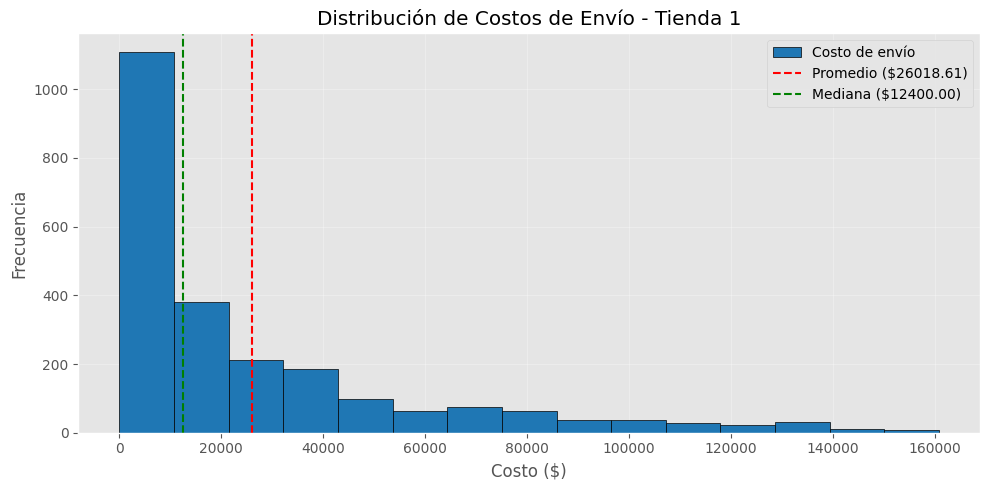


📦 Tienda 2 - Análisis de costos de envío
💰 Costo promedio de envío: $25216.24
📊 Mediana de costos: $11600.00
⬇️ Mínimo costo: $0.00
⬆️ Máximo costo: $162500.00


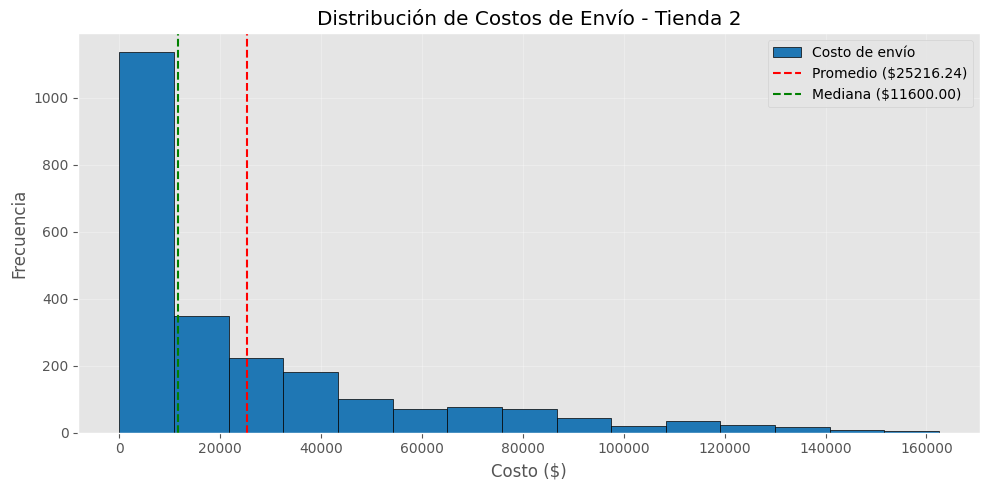


📦 Tienda 3 - Análisis de costos de envío
💰 Costo promedio de envío: $24805.68
📊 Mediana de costos: $11900.00
⬇️ Mínimo costo: $0.00
⬆️ Máximo costo: $158400.00


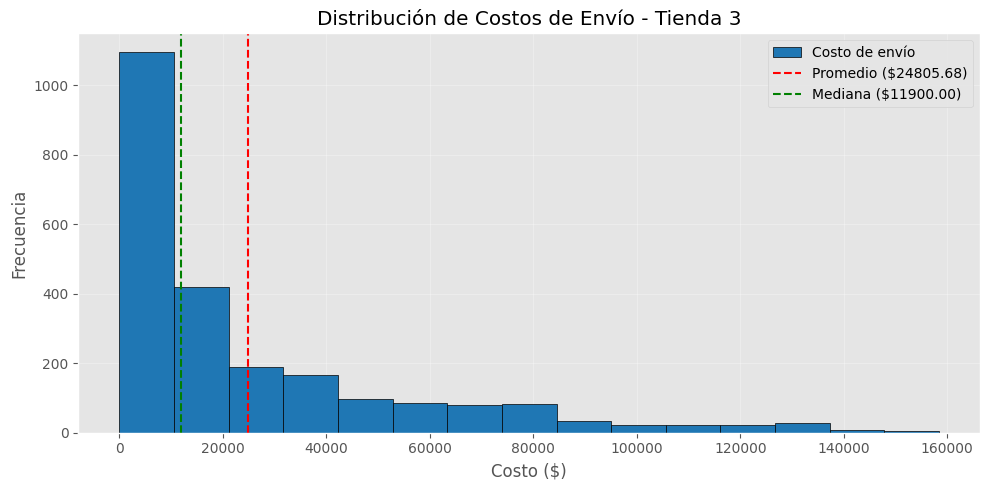


📦 Tienda 4 - Análisis de costos de envío
💰 Costo promedio de envío: $23459.46
📊 Mediana de costos: $10950.00
⬇️ Mínimo costo: $0.00
⬆️ Máximo costo: $154700.00


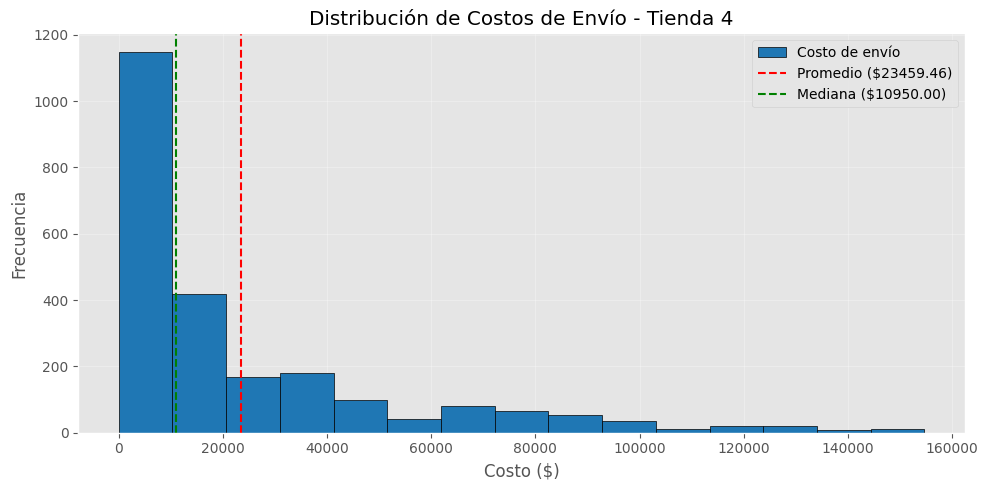


📌 RESUMEN COMPARATIVO DE COSTOS DE ENVÍO
  Tienda  Costo Promedio  Costo Mediano  Mínimo   Máximo
Tienda 1    26018.609580        12400.0     0.0 160800.0
Tienda 2    25216.235693        11600.0     0.0 162500.0
Tienda 3    24805.680373        11900.0     0.0 158400.0
Tienda 4    23459.457167        10950.0     0.0 154700.0


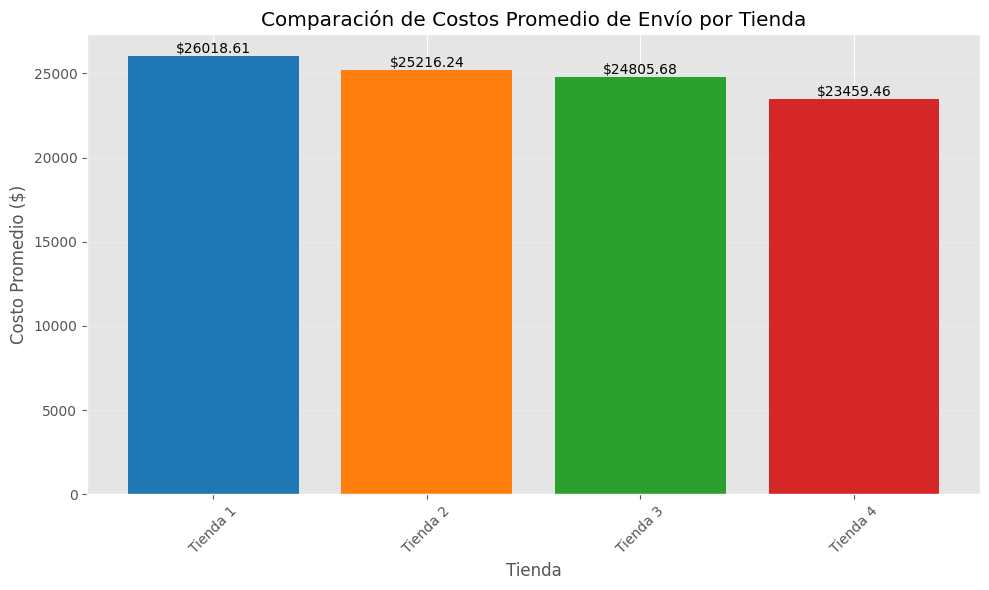

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de estilo
plt.style.use('ggplot')

# Diccionario de tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Lista para almacenar resultados
resultados_envios = []

for nombre, df in tiendas.items():
    print(f"\n📦 {nombre} - Análisis de costos de envío")

    # Verificar columna de costos de envío
    columna_envio = 'Costo de envío'  # Puedes ajustar este nombre según tus datos

    if columna_envio in df.columns:
        # Cálculos estadísticos
        promedio = df[columna_envio].mean()
        mediana = df[columna_envio].median()
        minimo = df[columna_envio].min()
        maximo = df[columna_envio].max()

        # Almacenar resultados
        resultados_envios.append({
            'Tienda': nombre,
            'Costo Promedio': promedio,
            'Costo Mediano': mediana,
            'Mínimo': minimo,
            'Máximo': maximo
        })

        # Mostrar resultados por tienda
        print(f"💰 Costo promedio de envío: ${promedio:.2f}")
        print(f"📊 Mediana de costos: ${mediana:.2f}")
        print(f"⬇️ Mínimo costo: ${minimo:.2f}")
        print(f"⬆️ Máximo costo: ${maximo:.2f}")

        # Histograma de distribución de costos
        plt.figure(figsize=(10, 5))
        df[columna_envio].plot.hist(bins=15, color='#1f77b4', edgecolor='black')
        plt.title(f'Distribución de Costos de Envío - {nombre}')
        plt.xlabel('Costo ($)')
        plt.ylabel('Frecuencia')
        plt.axvline(promedio, color='red', linestyle='--', label=f'Promedio (${promedio:.2f})')
        plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana (${mediana:.2f})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    else:
        print(f"⚠️ Advertencia: No se encontró la columna '{columna_envio}'")
        print("Columnas disponibles:", df.columns.tolist())

# Resultados consolidados
if resultados_envios:
    df_resultados = pd.DataFrame(resultados_envios)
    df_resultados = df_resultados.sort_values('Costo Promedio', ascending=False)

    print("\n📌 RESUMEN COMPARATIVO DE COSTOS DE ENVÍO")
    print(df_resultados.to_string(index=False))

    # Gráfico comparativo entre tiendas
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_resultados['Tienda'], df_resultados['Costo Promedio'],
                  color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

    # Añadir etiquetas con los valores
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.2f}',
                ha='center', va='bottom')

    plt.title('Comparación de Costos Promedio de Envío por Tienda')
    plt.ylabel('Costo Promedio ($)')
    plt.xlabel('Tienda')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo se pudo calcular ningún costo de envío. Verifica los nombres de las columnas.")